In [ ]:
!pip install vaderSentiment
!pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 58.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
# Standard Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# For Web Scrapping
import requests
from bs4 import BeautifulSoup

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.tools as tls

# For Data Pre-processing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

# For topic modeling
from sklearn.decomposition import NMF, LatentDirichletAllocation

# For sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100
df = pd.DataFrame()
reviews = []

In [ ]:
for i in range(1, pages + 1):

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Retrieve HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"Scraping page {i} -> {len(reviews)} total reviews")

Scraping page 1 -> 100 total reviews
Scraping page 2 -> 200 total reviews
Scraping page 3 -> 300 total reviews
Scraping page 4 -> 400 total reviews
Scraping page 5 -> 500 total reviews
Scraping page 6 -> 600 total reviews
Scraping page 7 -> 700 total reviews
Scraping page 8 -> 800 total reviews
Scraping page 9 -> 900 total reviews
Scraping page 10 -> 1000 total reviews
Scraping page 11 -> 1100 total reviews
Scraping page 12 -> 1200 total reviews
Scraping page 13 -> 1300 total reviews
Scraping page 14 -> 1400 total reviews
Scraping page 15 -> 1500 total reviews
Scraping page 16 -> 1600 total reviews
Scraping page 17 -> 1700 total reviews
Scraping page 18 -> 1800 total reviews
Scraping page 19 -> 1900 total reviews
Scraping page 20 -> 2000 total reviews


In [ ]:
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | For the price paid (bought ...
1,✅ Trip Verified | Flight left on time and arr...
2,✅ Trip Verified | Very Poor Business class pr...
3,Not Verified | This review is for LHR-SYD-LHR....
4,✅ Trip Verified | Absolutely pathetic business...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
# Function to clean the text
def text_scrub(text):
# To remove all numericals and special characters except alphabets.
    text = re.sub('[^A-Za-z_]+', ' ', str(text))
    return text

In [ ]:
# Cleaning the text in the review column
df['cleanedReviews'] = df['reviews'].apply(text_scrub)
df.head()

,reviews,cleanedReviews
0,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...
1,Flight left on time and arrived over half an...,Flight left on time and arrived over half an ...
2,"Very Poor Business class product, BA is not ...",Very Poor Business class product BA is not ev...
3,This review is for LHR-SYD-LHR. BA015 and BA0...,This review is for LHR SYD LHR BA and BA Busi...
4,Absolutely pathetic business class product. B...,Absolutely pathetic business class product BA...


In [ ]:
# Converting the entire texts to lower case
df['cleanedReviews'] = df['cleanedReviews'].str.lower()

In [ ]:
df1 = df

In [ ]:
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist


df['posTaggedReviews'] = df['cleanedReviews'].apply(token_stop_pos)
df.head()

,reviews,cleanedReviews,posTaggedReviews
0,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...,"[(price, n), (paid, v), (bought, n), (sale, n)..."
1,Flight left on time and arrived over half an...,Flight left on time and arrived over half an ...,"[(Flight, n), (left, v), (time, n), (arrived, ..."
2,"Very Poor Business class product, BA is not ...",Very Poor Business class product BA is not ev...,"[(Poor, n), (Business, n), (class, n), (produc..."
3,This review is for LHR-SYD-LHR. BA015 and BA0...,This review is for LHR SYD LHR BA and BA Busi...,"[(review, n), (LHR, n), (SYD, n), (LHR, n), (B..."
4,Absolutely pathetic business class product. B...,Absolutely pathetic business class product BA...,"[(Absolutely, r), (pathetic, a), (business, n)..."


In [ ]:
# Obtaining the stem words – Lemmatization
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['lemmatisedReviews'] = df['posTaggedReviews'].apply(lemmatize)
df.head()

,reviews,cleanedReviews,posTaggedReviews,lemmatisedReviews
0,For the price paid (bought during a sale) it...,For the price paid bought during a sale it wa...,"[(price, n), (paid, v), (bought, n), (sale, n)...",price pay bought sale decent experience alth...
1,Flight left on time and arrived over half an...,Flight left on time and arrived over half an ...,"[(Flight, n), (left, v), (time, n), (arrived, ...",Flight leave time arrive half hour earlier s...
2,"Very Poor Business class product, BA is not ...",Very Poor Business class product BA is not ev...,"[(Poor, n), (Business, n), (class, n), (produc...",Poor Business class product BA even close ai...
3,This review is for LHR-SYD-LHR. BA015 and BA0...,This review is for LHR SYD LHR BA and BA Busi...,"[(review, n), (LHR, n), (SYD, n), (LHR, n), (B...",review LHR SYD LHR BA BA Business class conf...
4,Absolutely pathetic business class product. B...,Absolutely pathetic business class product BA...,"[(Absolutely, r), (pathetic, a), (business, n)...",Absolutely pathetic business class product B...


In [ ]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['sentiment'] = df['lemmatisedReviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['analysis'] = df['sentiment'].apply(vader_analysis)
# df.head()

In [ ]:
sentimentCounts = df['analysis'].value_counts()
sentimentCounts

Positive    999
Negative    756
Neutral     245
Name: analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7986ee70a740>,
 [Text(0.0017278530032240136, 1.0999986429646171, 'Positive'),
  Text(-0.4145580984795792, -1.018892331399641, 'Negative'),
  Text(1.251256400318077, -0.5068110305262193, 'Neutral')],
 [Text(0.0009424652744858255, 0.599999259798882, '50.0%'),
  Text(-0.2261225991706795, -0.5557594534907132, '37.8%'),
  Text(0.7878281039039743, -0.3191032414424344, '12.3%')])

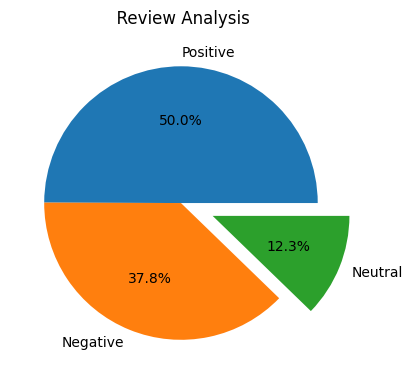

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title("  Review Analysis ")
plt.pie(sentimentCounts.values, labels = sentimentCounts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

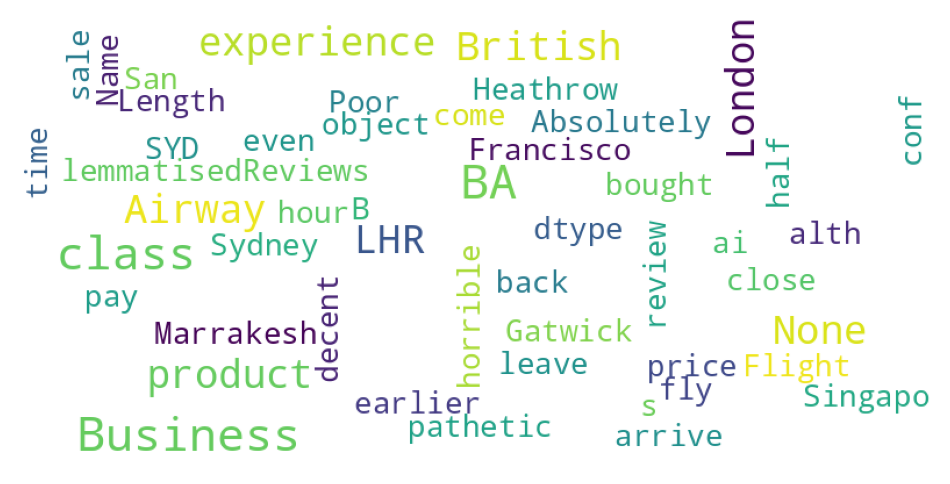

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def showWordCloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=20,
        scale=2,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

showWordCloud(df.lemmatisedReviews)

In [ ]:
import plotly.express as px
import plotly.offline as pyo
# Assuming df is your DataFrame with a 'reviews' column
all_words = df['reviews'].str.split(expand=True).unstack().value_counts()

# Create a bar chart using Plotly Express
fig = px.bar(
    x=all_words.index.values[2:50],
    y=all_words.values[2:50],
    labels={'x': 'Words', 'y': 'Frequency'},
    title='Top 50 Word frequencies in the dataset',
    color=all_words.values[2:50],  # You can customize the color scale
)

# Update text parameter to display word counts
fig.update_traces(text=all_words.values[2:50])

# Initialize notebook mode
pyo.init_notebook_mode(connected=True)

# Show the plot in the notebook
pyo.iplot(fig)
fig.write_html('top_words_plot.html')

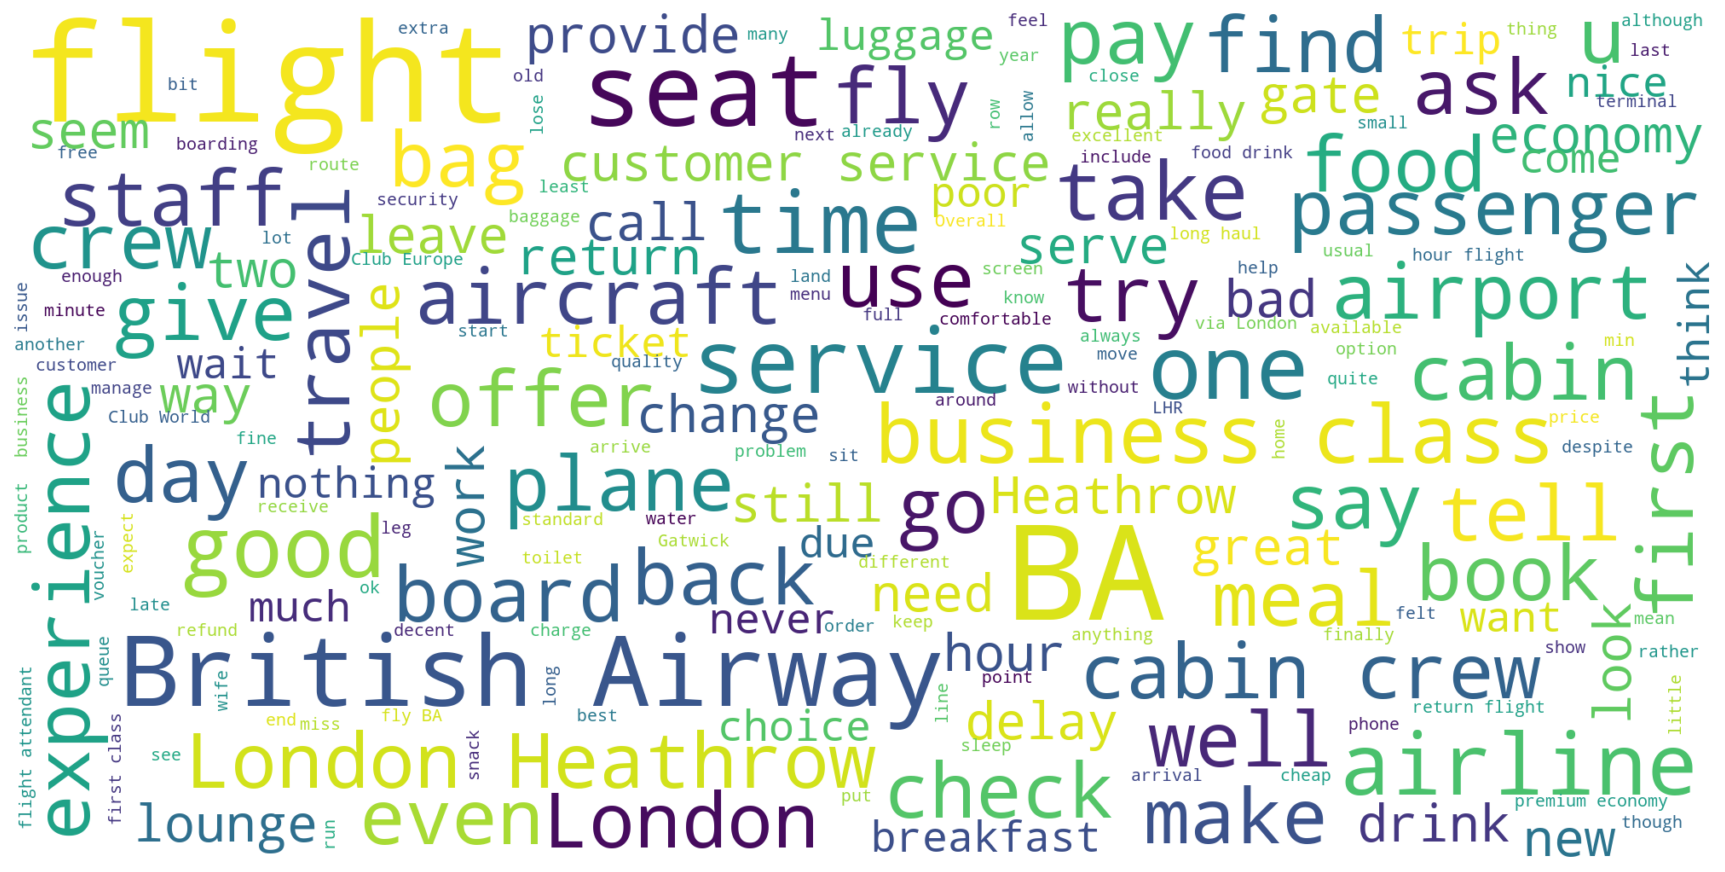

In [ ]:
text = " ".join(i for i in df.lemmatisedReviews)
wordcloud = WordCloud(
        background_color='white',
        max_font_size=32,
        scale=5).generate(text)
fig = plt.figure(1, figsize=(22, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()